<a href="https://colab.research.google.com/github/Olayasser301/Car-Sales-Prediction-Project/blob/main/Mini_Project_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()


<ipython-input-98-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
print(df)

       year      make         model         trim          body transmission  \
0      2013   Hyundai        Sonata          GLS         sedan    automatic   
1      2014    Toyota       4Runner          SR5           SUV    automatic   
2      2012     Lexus        IS 250         Base         Sedan    automatic   
3      2002       BMW            X5         4.4i           SUV    automatic   
4      2014      Ford  E-Series Van        E-250  E-Series Van    automatic   
...     ...       ...           ...          ...           ...          ...   
46573  2013      Ford          Edge           SE           SUV    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey       g sedan    automatic   
46575  2013       BMW      3 Series         328i         Sedan    automatic   
46576  2013    Toyota         Camry           LE         Sedan    automatic   
46577  2013       Kia           Rio           LX         Sedan    automatic   

                     vin state  condition    odomet

In [ ]:
print (df.isna().any(axis=1))
#searching if there's NAN/null values found in the dataset

0        False
1        False
2        False
3        False
4        False
         ...  
46573    False
46574    False
46575    False
46576    False
46577    False
Length: 46578, dtype: bool


In [ ]:
df1 =df.isna().any(axis=1)
#print(df1.to_string())
print(df1.sum())
#No Nan/Null Values were found

0


In [ ]:
df["body"] = df["body"].str.extract('(Sedan|sedan|Coupe|coupe|suv|SUV|Van|van|Cab|cab|Convertible|convertible|Wagon|wagon|Hatchback|hatchback|Koup|SuperCrew|supercrew)',expand=False)
print(df)
#Extracted the body of the mentioned body types in the document.

       year      make         model         trim   body transmission  \
0      2013   Hyundai        Sonata          GLS  sedan    automatic   
1      2014    Toyota       4Runner          SR5    SUV    automatic   
2      2012     Lexus        IS 250         Base  Sedan    automatic   
3      2002       BMW            X5         4.4i    SUV    automatic   
4      2014      Ford  E-Series Van        E-250    Van    automatic   
...     ...       ...           ...          ...    ...          ...   
46573  2013      Ford          Edge           SE    SUV    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey  sedan    automatic   
46575  2013       BMW      3 Series         328i  Sedan    automatic   
46576  2013    Toyota         Camry           LE  Sedan    automatic   
46577  2013       Kia           Rio           LX  Sedan    automatic   

                     vin state  condition    odometer   color interior  \
0      5npeb4acxdh702805    ma        3.9   50404.0mi   black

In [ ]:
df["body"].replace(["sedan"],"Sedan",inplace=True)
df["body"].replace(["cab","supercrew", "Cab" , "Supercrew"],"Pickup Truck",inplace=True)
df["body"].replace(["coupe","Koup"],"Coupe",inplace=True)
df["body"].replace(["convertible"],"Convertible",inplace=True)
df["body"].replace(["hatchback"],"Hatchback",inplace=True)
df["body"].replace(["suv"],"SUV",inplace=True)
df["body"].replace(["van","Van"],"Minivan",inplace=True)
df["body"].replace(["wagon"],"Wagon",inplace=True)
df["body"].value_counts()
#Cleaned the data and normalized it by doing it the same format and counted to make sure that there's no missing values were detected.


Sedan           21574
SUV             11936
Pickup Truck     3367
Minivan          2632
Hatchback        2270
Coupe            1787
Wagon            1438
Convertible       964
SuperCrew         610
Name: body, dtype: int64

In [ ]:
#converting the Odometer , Selling price and MMR to integers
df["odometer"] = df["odometer"].str.extract('(\d+)', expand = False).astype(int)
print(df["odometer"])
df["mmr"] = df["mmr"].str.extract('(\d+)', expand = False).astype(int)
print(df["mmr"])
df["sellingprice"] = df["sellingprice"].str.extract('(\d+)', expand = False).astype(int)
print(df["sellingprice"])


0         50404
1         17846
2         21122
3        145303
4          6714
          ...  
46573     52844
46574     23185
46575     45357
46576     43376
46577     49953
Name: odometer, Length: 46578, dtype: int64
0        11000
1        28700
2        22200
3         3675
4        22500
         ...  
46573    15650
46574    19350
46575    22200
46576    13400
46577     9700
Name: mmr, Length: 46578, dtype: int64
0        10900
1        29900
2        24200
3         3200
4        22100
         ...  
46573    17000
46574    21500
46575    22000
46576    13800
46577     9300
Name: sellingprice, Length: 46578, dtype: int64


In [ ]:
#Dropping VIN , trim , state, interior,seller,saledate and MMR columns since we don't need it for the modeling
df = df.drop(columns=['vin'])
df = df.drop(columns=['state'])
df = df.drop(columns=['interior'])
df = df.drop(columns=['seller'])
df = df.drop(columns=['saledate'])
df = df.drop(columns=['trim'])
df = df.drop(columns =['mmr'])
print(df.head())


   year     make         model     body transmission  condition  odometer  \
0  2013  Hyundai        Sonata    Sedan    automatic        3.9     50404   
1  2014   Toyota       4Runner      SUV    automatic        4.9     17846   
2  2012    Lexus        IS 250    Sedan    automatic        4.1     21122   
3  2002      BMW            X5      SUV    automatic        1.9    145303   
4  2014     Ford  E-Series Van  Minivan    automatic        4.9      6714   

    color  sellingprice  
0   black         10900  
1    gray         29900  
2  silver         24200  
3   black          3200  
4   white         22100  


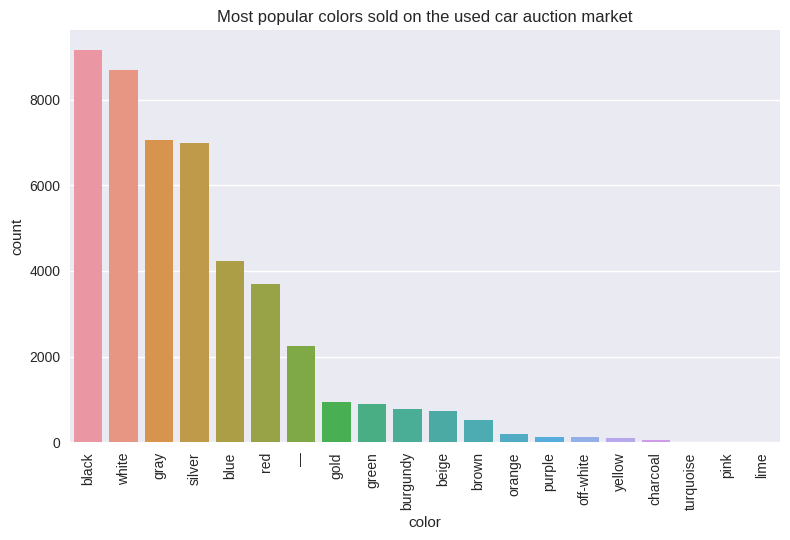

In [ ]:
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()
#Black , White and Grey are the most popular color sold in the auction.

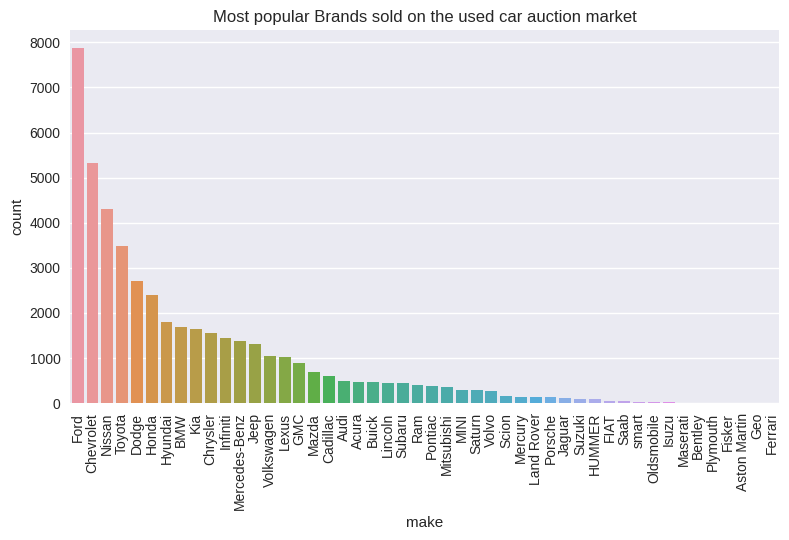

In [ ]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular Brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()
#Ford , Chevrolet and Nissan are the most popular car brands being sold.

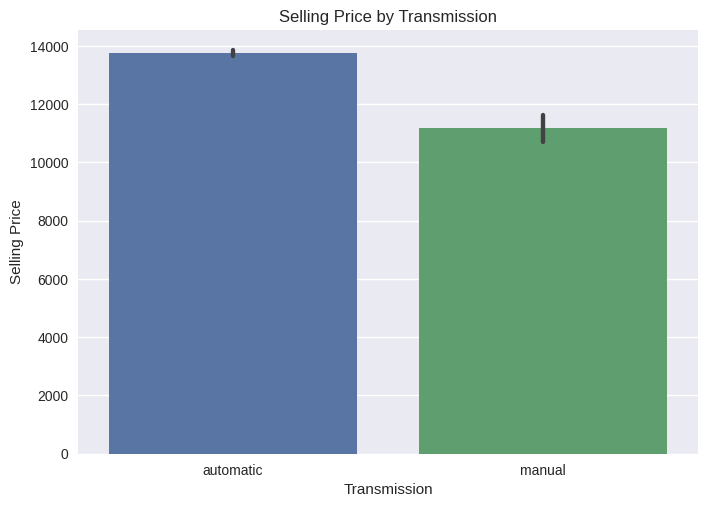

In [ ]:
sns.barplot(data=df, x='transmission', y='sellingprice')
plt.title('Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

#The bar plot above shows the selling price of each of the transmission categories.Automatic cars, on average, sell for a higher price than manual cars.

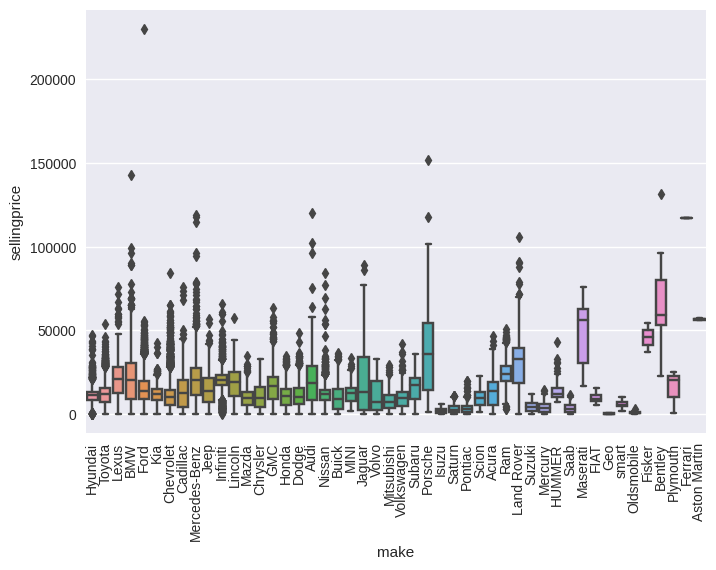

In [ ]:
sns.boxplot(data=df, x='make', y='sellingprice')
plt.xticks(rotation=90)
plt.show()
# By Analyzing the BoxPlot , one can see that by the wider the BoxPlot, the wider the Distribution So,  MASARATI , PORSCHE AND JAGUAR have the widest distribution. while the most expensive is Ford and Porsche just by analyzing the whiskers in the plot.

In [ ]:
df["sellingprice"].corr(df["odometer"])
#the correlation between the odometer and selling price of the car is highly correlated.

-0.5808998783726378

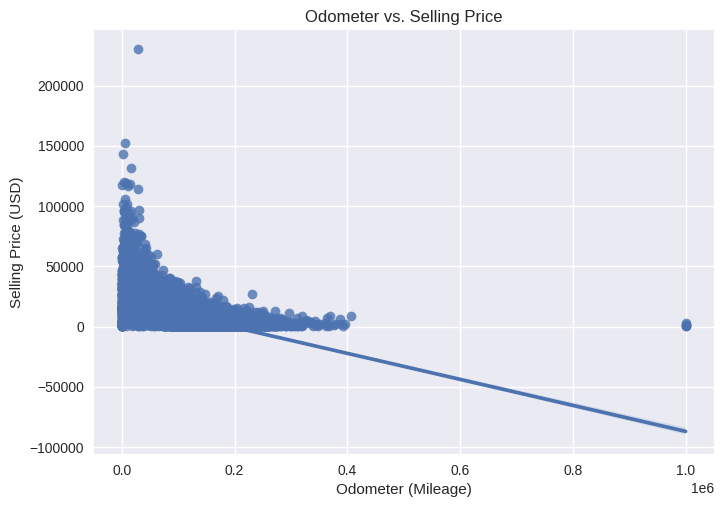

In [ ]:
sns.regplot(x=df["odometer"], y=df["sellingprice"])
plt.title("Odometer vs. Selling Price")
plt.xlabel("Odometer (Mileage)")
plt.ylabel("Selling Price (USD)")
plt.show()
#the correlation between the odometer and selling price of the car is highly correlated , while the selling price gets higher when the odometer gets closer to 0.

In [ ]:
df["sellingprice"].corr(df["condition"])
#there is correlation between them and they are average but on the high end of correlation.


0.5291410183967024

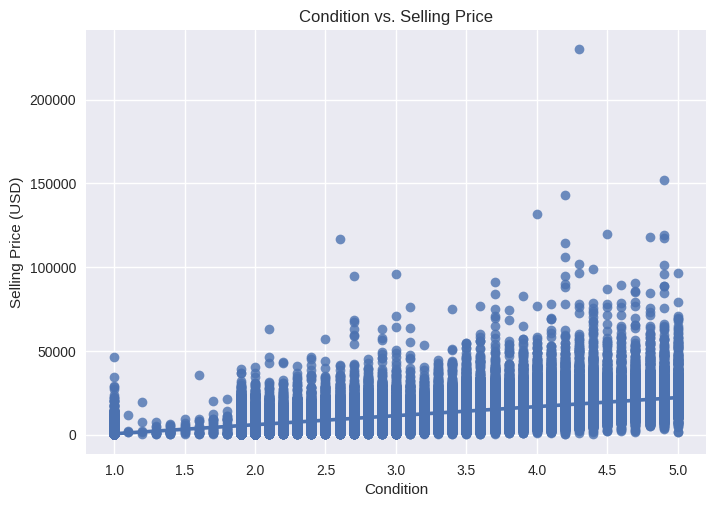

In [ ]:
sns.regplot(x=df["condition"], y=df["sellingprice"])
plt.title("Condition vs. Selling Price")
plt.xlabel("Condition")
plt.ylabel("Selling Price (USD)")
plt.show()
#there is correlation between them and they are average but on the high end of correlation where the better the condition gets , the higher the selling price is.

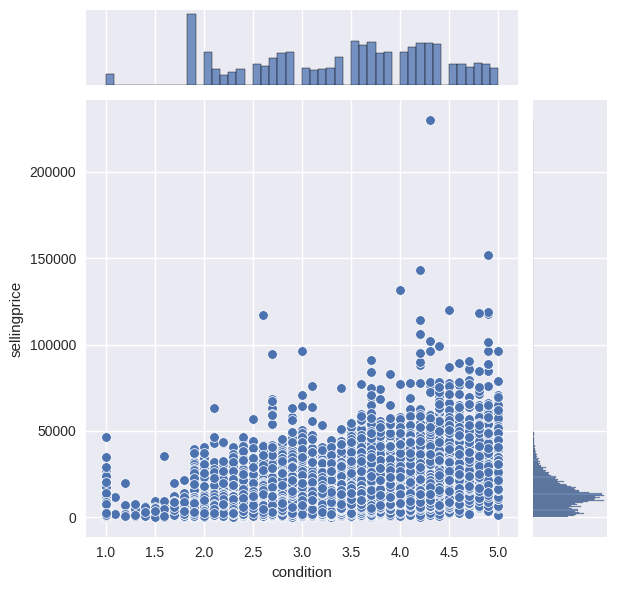

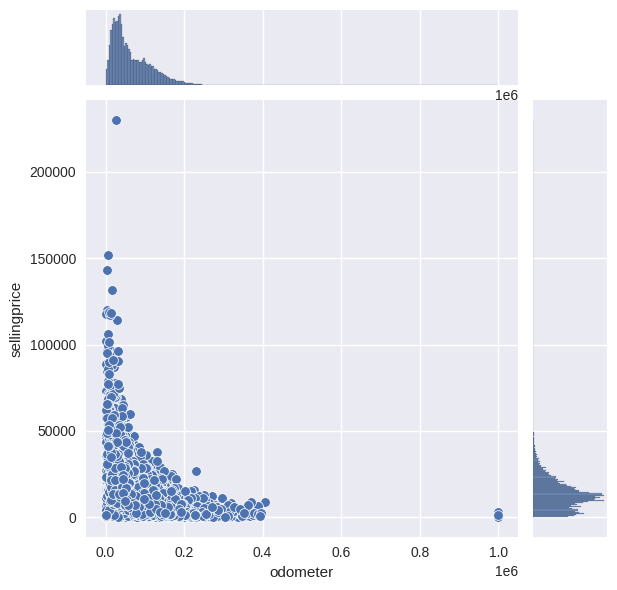

In [ ]:
import matplotlib.pyplot as py
import seaborn as sns
%matplotlib inline
sns.jointplot(x="condition",y="sellingprice", data=df)
sns.jointplot(x ="odometer" , y ="sellingprice" , data=df)
#visualizing the data and seeing the correlation.

body
Convertible     17581.563278
Coupe           16538.921097
Hatchback       10320.636123
Minivan         11981.053571
Pickup Truck    17273.128601
SUV             16221.941270
Sedan           11861.795912
SuperCrew       21893.214754
Wagon            9872.678720
Name: sellingprice, dtype: float64
body
SuperCrew       21893.214754
Convertible     17581.563278
Pickup Truck    17273.128601
Coupe           16538.921097
SUV             16221.941270
Minivan         11981.053571
Sedan           11861.795912
Hatchback       10320.636123
Wagon            9872.678720
Name: sellingprice, dtype: float64
Most Expensive Car Body Type: SuperCrew
Least Expensive Car Body Type: Wagon


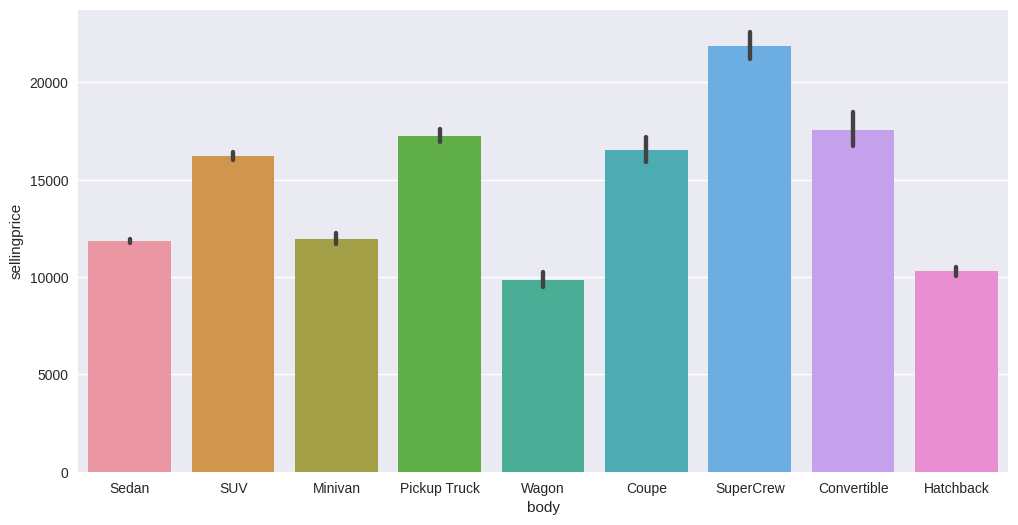

In [ ]:
# Drawing a bar plot to show the selling price of each body category
plt.figure(figsize=(12, 6))
sns.barplot(x="body", y="sellingprice", data=df)

# Calculating and displaying the mean selling price for each body category
body_mean_price = df.groupby("body")["sellingprice"].mean()
print(body_mean_price)

# Ranking the body categories based on mean selling price
ranked_bodies = body_mean_price.sort_values(ascending=False)
print(ranked_bodies)

# Stating the most expensive and least expensive car body type
most_expensive = ranked_bodies.index[0]
least_expensive = ranked_bodies.index[-1]
print("Most Expensive Car Body Type:", most_expensive)
print("Least Expensive Car Body Type:", least_expensive)
## AS you can see the least expensive car is the Wagon while the most expensive is SuperCrew. And yes THERE IS a difference of the average between the means of the car brands as you can see on console..

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
## Doing Hot one_encoding for the variables that will be with us in building the model.
le = LabelEncoder()
df['make'] = le.fit_transform(df['make'])
df['model'] = le.fit_transform(df['model'])
df['body'] = le.fit_transform(df['body'])
df['transmission'] = le.fit_transform(df['transmission'])
df['condition'] = le.fit_transform(df['condition'])
df['color'] = le.fit_transform(df['color'])
##Splitting the data into training and testing sets.
X = df.drop('sellingprice', axis=1)
y = df['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Training dataset size:', X_train.shape[0])
print('Testing dataset size:', X_test.shape[0])
#we'll use 37262 to train while the others(9316) are for testing.

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
#builidng the model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the selling price values for the cars.
y_pred = model.predict(X_test)
print(y_pred)


[17317.40763412 14493.84258351 16882.5217083  ... 18558.910049
 12077.76245422 14478.52832789]


In [ ]:
#Evaluating the accuracy of the model using MAE , MSE And RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#This model is not very accurate where the gets farther away from 0 in the RMSE


Mean Absolute Error: 4855.559819389155
Mean Squared Error: 49786772.909637384
Root Mean Squared Error: 7055.974270760727


In [ ]:
##PROJET WAS DONE BY Ola Yasser Abou el Naga , 52-14576 , BI , T8